In [8]:
import torch
import torchvision
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import torch.nn as nn
import torch.nn.functional as F
from torchvision.datasets import MNIST
from torchvision.transforms import ToTensor
from torchvision.utils import make_grid
from torch.utils.data.dataloader import DataLoader
from torch.utils.data import random_split

%matplotlib inline
matplotlib.rcParams['figure.facecolor'] = '#ffffff'


## Load MNIST Dataset

- **`root='data/'`**: Directory to store or load the dataset.  
- **`download=True`**: Automatically downloads the dataset if not found locally.  
- **`transform=ToTensor()`**: Converts PIL images to PyTorch tensors with pixel values scaled to `[0, 1]`.

In [9]:
dataset = MNIST(root='data/', download=True, transform=ToTensor())


## Inspect a Sample from the MNIST Dataset

- **`image, label = dataset[0]`**: Retrieves the first image and its corresponding label from the dataset.  
- **`image.shape`**: Prints the tensor shape of the image. For MNIST with `ToTensor()`, this is typically `(1, 28, 28)` — (channels, height, width).  
- **`image.permute(1, 2, 0)`**: Rearranges dimensions from `(C, H, W)` to `(H, W, C)` so `matplotlib` can display it correctly.  
- **`cmap='gray'`**: Displays the image in grayscale, matching MNIST’s single-channel format.  
- **`label`**: The true digit (0–9) associated with the image.

image.shape torch.Size([1, 28, 28])
Label: 5


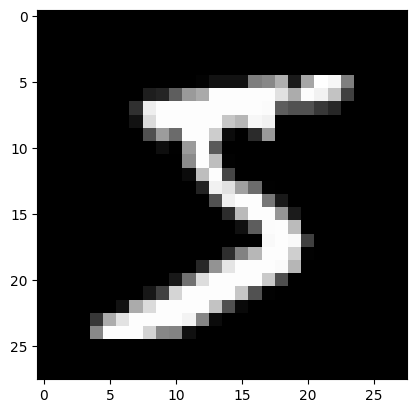

In [10]:
image , label = dataset[0]
print('image.shape', image.shape)
plt.imshow(image.permute(1,2,0),cmap='gray')
print('Label:', label)

## Split Dataset into Training and Validation Sets

- **`val_size = 10000`**: Defines the number of samples to reserve for validation.  
- **`train_size = len(dataset) - val_size`**: Computes the remaining samples for training (60,000 for MNIST).  
- **`random_split(...)`**: Randomly splits the dataset into two subsets:  
  - `train_ds`: Training set (60,000 samples)  
  - `val_ds`: Validation set (10,000 samples)  
- The final line returns the sizes of both subsets to verify the split.

In [11]:
val_size=10000
train_size=len(dataset)-val_size

train_ds, val_ds = random_split(dataset, [train_size, val_size])
len(train_ds), len(val_ds)

(50000, 10000)

## Create Data Loaders

- **`batch_size = 128`**: Number of samples per batch for the training loader.  
- **`train_loader`**:  
  - Loads data from `train_ds` in batches of 128.  
  - `shuffle=True` randomizes the order of samples in each epoch for better generalization.  
- **`val_loader`**:  
  - Uses a larger batch size (`256`) for faster validation.  
  - `num_workers=4` enables multi-process data loading to speed up preprocessing.  
  - `pin_memory=True` optimizes GPU memory transfer by allocating data in pinned (page-locked) memory.

In [14]:
batch_size=128

train_loader = DataLoader(train_ds, batch_size, shuffle=True, num_workers=4, pin_memory=True)
val_loader = DataLoader(val_ds, batch_size*2, num_workers=4, pin_memory=True)


## Visualize a Batch of Training Images

- **`for images, _ in train_loader:`**: Iterates over the training data loader; ignores labels (`_`).  
- **`images.shape`**: Prints the shape of the batch (e.g., `[128, 1, 28, 28]` → 128 images, 1 channel, 28×28 pixels).  
- **`plt.figure(figsize=(16,8))`**: Sets the figure size for better visibility.  
- **`make_grid(images, nrow=16)`**: Arranges the batch of images into a single grid with 16 images per row.  
- **`.permute((1,2,0))`**: Reorders tensor dimensions from (C, H, W) to (H, W, C) for correct display with `matplotlib`.  
- **`plt.axis('off')`**: Hides axis ticks and labels for a cleaner look.  
- **`break`**: Stops after the first batch to avoid plotting multiple grids.

images.shape: torch.Size([128, 1, 28, 28])


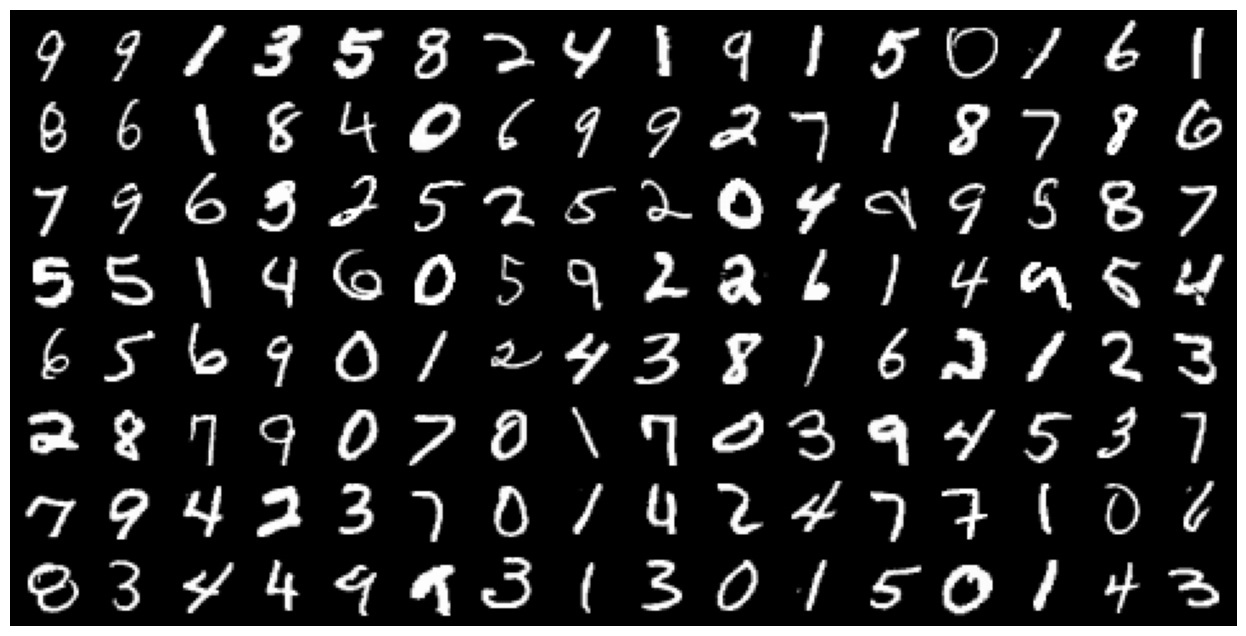

In [16]:
for images, _ in train_loader:
    print('images.shape:', images.shape)
    plt.figure(figsize=(16,8))
    plt.axis('off')
    plt.imshow(make_grid(images, nrow=16).permute((1,2,0)))
    break

In [20]:
for images, _ in train_loader:
    print('images.shape:', images.shape)
    print('grid.shape:', make_grid(images, nrow=16).shape)
    break
    

/usr/local/lib/python3.12/dist-packages/torch/utils/data/dataloader.py:627: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/torch/utils/data/dataloader.py:668: UserWarning: 'pin_memory' argument is set as true but no accelerator is found, then device pinned memory won't be used.
  warnings.warn(warn_msg)


images.shape: torch.Size([128, 1, 28, 28])
grid.shape: torch.Size([3, 242, 482])
